In [1]:
import pandas as pd
import numpy as np

The above distance is equal to the below distance for MEAN

In [18]:
file = pd.read_csv("AmesHousing_1.txt", sep = "\t")

pd.options.display.max_columns = 82
file.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [8]:
parameter = file["SalePrice"].mean()

# Effect of increasing sample size on sample error

Starting sample size by 5, and increasing it by 29 with each iteration so it nears 2930. But not equal to 2930, as this is the population and obviously sampling error would be 0

In [10]:
sample_size = 5

sampling_error = []
sample_mean = []
num_sample = []

for i in range(101):
    num_sample.append(sample_size)
    sample = file["SalePrice"].sample(sample_size, random_state = i)
    statistic = sample.mean()
    sample_mean.append(statistic)
    se = parameter - statistic
    sampling_error.append(se)
    sample_size += 29
    
    

In [14]:
import matplotlib.pyplot as plt

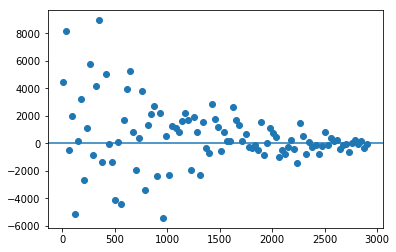

In [16]:
plt.scatter(num_sample, sampling_error)
plt.axhline(0)

As the sample size keeps on increasing, the sampling error decreases. The sampling error converges to zero as the sample size nears the population

In [19]:
file["TotRms AbvGrd"].value_counts() #ratio

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64

In [21]:
mapping = {"10 or more":"10"} #replacing 10 or more by 10 using dictionary
file["TotRms AbvGrd"].replace(mapping, inplace = True)

In [30]:
rooms = file["TotRms AbvGrd"].astype(int)

In [24]:
file["TotRms AbvGrd"].median()

6.0

In [ ]:
def med():
    

Median shows resistance to change whereas mean gets affected by outliers. Median is known as a robust statistic

Median is applied when 1) outliers are present in the data and 2)data is open-ended


In [25]:
file["Land Slope"].value_counts() #ordinal data but not numeric

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [26]:
file["Roof Style"].value_counts() #nominal data as unique but no size or direction

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

In [32]:
print(rooms.mean())
print(rooms.mode()[0])
print(np.median(rooms))


6.417064846416382
6
6.0


Mode is a good average to quote compared to mean and median. In continuous data, mode is difficult to find. So class interval is formed and then mode is obtained.

In [35]:
print(file["SalePrice"].mode()[0])
print(file["SalePrice"].mean())
print(np.median(file["SalePrice"]))

135000
180796.0600682594
160000.0


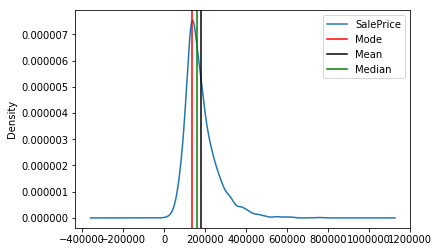

In [42]:
file["SalePrice"].plot.kde()
plt.axvline(file["SalePrice"].mode()[0], label="Mode", color='red')
plt.axvline(file["SalePrice"].mean(), label="Mean", color='black')
plt.axvline(np.median(file["SalePrice"]), label="Median", color='green')
plt.legend()

#### Mode is at the peak of kde

We can determine skewness by observing value of mode. The current value indicates the distribution is right skewed